<a href="https://colab.research.google.com/github/chaima466/chaima_hassini_analysr_result/blob/main/Analyse_exploratoire_et_visualisation_des_donn%C3%A9es_biologiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
# === setup_and_download.sh ===
echo "==> Installation des paquets Python nécessaires..."
pip install --quiet pandas numpy seaborn plotly scikit-learn matplotlib ipywidgets streamlit

echo "==> Création du dossier data et téléchargement du dataset Palmer Penguins..."
DATA_DIR="data"
mkdir -p $DATA_DIR
curl -s -L -o $DATA_DIR/penguins.csv "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

echo "==> Liste du dossier data :"
ls -l $DATA_DIR

echo "==> Fin du script Bash."


==> Installation des paquets Python nécessaires...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:00
==> Création du dossier data et téléchargement du dataset Palmer Penguins...
==> Liste du dossier data :
total 16
-rw-r--r-- 1 root root 13478 Nov  3 14:57 penguins.csv
==> Fin du script Bash.


In [ ]:
# === Chargement & aperçu ===
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv("data/penguins.csv")
print("✅ Chargé : ", "data/penguins.csv")
print("Dimensions :", df.shape)
display(df.head())
print("\nTypes et valeurs manquantes :")
print(df.dtypes)
print(df.isnull().sum())

✅ Chargé :  data/penguins.csv
Dimensions : (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE



Types et valeurs manquantes :
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
# === Nettoyage propre ===
df = df.copy()  # éviter warnings de vues

# Remplacer sex manquant par 'Unknown'
df.loc[:, "sex"] = df["sex"].fillna("Unknown")

# Remplacer colonnes numériques manquantes par la moyenne (imputation simple)
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for c in num_cols:
    if c in df.columns:
        mean_c = df[c].mean(skipna=True)
        df.loc[:, c] = df[c].fillna(mean_c)

# Supprimer doublons éventuels
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f"Doublons supprimés : {before - after}")

# Sauvegarder version nettoyée
df.to_csv("data/penguins_clean.csv", index=False)
print("✅ Dataset nettoyé sauvegardé : data/penguins_clean.csv")
display(df.head())


Doublons supprimés : 0
✅ Dataset nettoyé sauvegardé : data/penguins_clean.csv


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Unknown
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


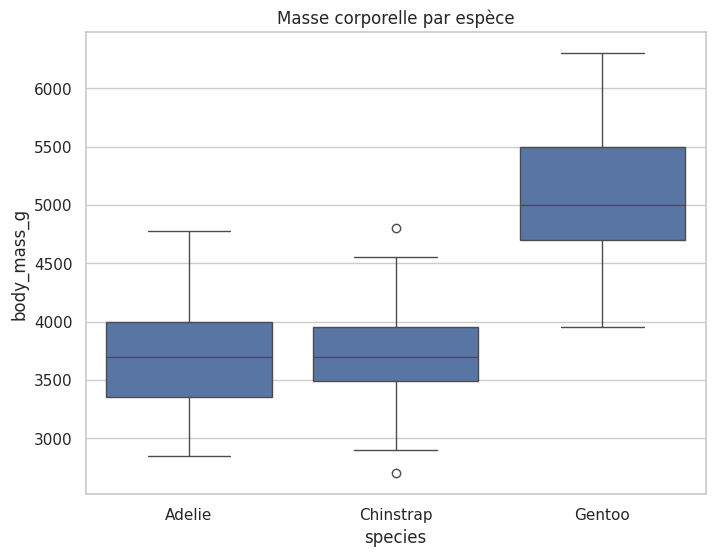

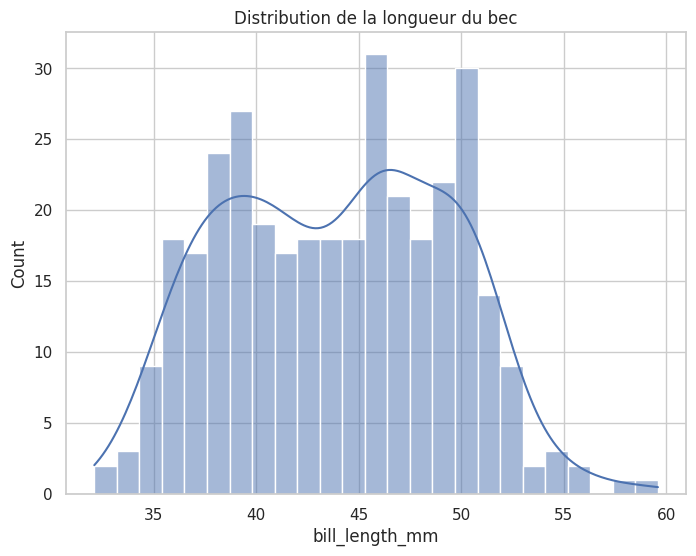

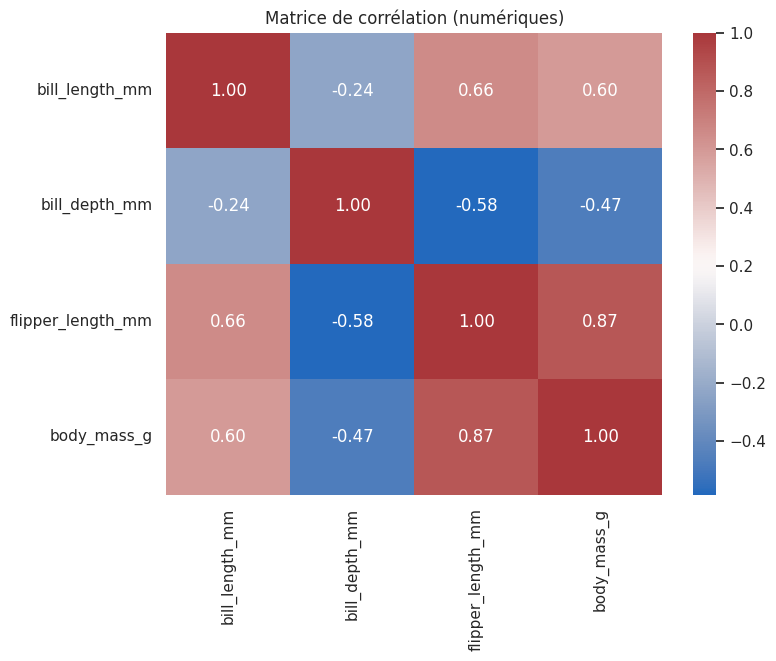

In [ ]:
# === Exploration descriptive ===
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="species", y="body_mass_g")
plt.title("Masse corporelle par espèce")
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df["bill_length_mm"], kde=True, bins=25)
plt.title("Distribution de la longueur du bec")
plt.show()

# Correlation simple entre variables numériques
num_df = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap="vlag")
plt.title("Matrice de corrélation (numériques)")
plt.show()


In [ ]:
# === Visualisations interactives Plotly ===
import plotly.express as px

df = pd.read_csv("data/penguins_clean.csv")

fig = px.scatter(df, x="bill_length_mm", y="flipper_length_mm",
                 color="species", symbol="sex",
                 size="body_mass_g",
                 hover_data=["island"],
                 title="Relation bill_length_mm vs flipper_length_mm")
fig.show()

fig2 = px.box(df, x="species", y="body_mass_g", color="species", title="Masse corporelle par espèce")
fig2.show()

mean_by_island = df.groupby("island")["body_mass_g"].mean().reset_index()
fig3 = px.bar(mean_by_island, x="island", y="body_mass_g", title="Masse moyenne par île")
fig3.show()


In [ ]:
# === Dashboard inline (ipywidgets) ===
!pip install --quiet ipywidgets
from ipywidgets import widgets, VBox, HBox, Output
from IPython.display import display
import plotly.express as px

df = pd.read_csv("data/penguins_clean.csv")

prop_dropdown = widgets.Dropdown(options=["body_mass_g", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
                                 value="body_mass_g",
                                 description="Variable:")
species_select = widgets.SelectMultiple(options=list(df["species"].unique()),
                                        value=list(df["species"].unique()),
                                        description="Species:")
out = Output()

def update(change=None):
    with out:
        out.clear_output(wait=True)
        var = prop_dropdown.value
        sel = list(species_select.value)
        dff = df[df["species"].isin(sel)]
        fig = px.box(dff, x="species", y=var, color="species", title=f"{var} par espèce")
        fig.show()

prop_dropdown.observe(update, names='value')
species_select.observe(update, names='value')

display(VBox([HBox([prop_dropdown, species_select]), out]))
update()


In [ ]:
# === Modélisation : RandomForest pour prédire l'espèce ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("data/penguins_clean.csv")
X = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]]
y = df["species"]

# Encode y si nécessaire (sklearn accepte strings pour labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9767441860465116
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        40
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       0.97      1.00      0.98        28

    accuracy                           0.98        86
   macro avg       0.97      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86



In [ ]:
# Installer les packages nécessaires
!pip install --quiet streamlit pyngrok pandas plotly

# Créer le fichier Streamlit
with open("streamlit_app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import plotly.express as px

# Dataset penguins
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df.dropna(inplace=True)

st.title("Dashboard Penguins - Streamlit")

species = st.multiselect("Species", options=df["species"].unique(), default=list(df["species"].unique()))
var = st.selectbox("Variable", ["body_mass_g","bill_length_mm","bill_depth_mm","flipper_length_mm"])

dff = df[df["species"].isin(species)]
st.plotly_chart(px.box(dff, x="species", y=var, color="species", title=f"{var} par espèce"))
st.dataframe(dff.head(50))
""")

# Configurer ngrok
from pyngrok import ngrok, conf
import subprocess
import time

conf.get_default().auth_token = "2qnubOcO1DIFiXEsEPJc0qBwj7x_NKamF2j6Sx24PxsoqxLZ"

# Lancer le tunnel ngrok
port = 8501
public_url = ngrok.connect(port).public_url
print(f"🌍 Dashboard accessible ici : {public_url}")

# Lancer Streamlit en arrière-plan
subprocess.Popen(["streamlit", "run", "streamlit_app.py", "--server.port", str(port)])
time.sleep(5)


🌍 Dashboard accessible ici : https://f21155959b0c.ngrok-free.app
